In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import data_preprocessing as dp
import torch
from sklearn.preprocessing import StandardScaler

spectrum_train = pd.read_excel("spectrum_train.xlsx")
spectrum_test = pd.read_excel("spectrum_valid.xlsx")
temp_train = pd.read_excel("temp_train.xlsx")
temp_test = pd.read_excel("temp_valid.xlsx")

In [2]:
combined = pd.read_excel("combined_data.xlsx")

In [262]:
spec = combined.iloc[:,11:].values

In [ ]:
scaler = StandardScaler()
spec_scaled = 

In [263]:
mean = spec.mean()
mean * 0.001

1.6036669879413346e-15

In [264]:
spec

array([[2.76101629e-13, 2.87276874e-13, 2.95217582e-13, ...,
        1.91842663e-12, 1.85564677e-12, 1.79781422e-12],
       [3.12970578e-13, 3.33812942e-13, 3.44972755e-13, ...,
        1.73777753e-12, 1.68193926e-12, 1.63050599e-12],
       [2.62680623e-13, 2.84534396e-13, 3.05757207e-13, ...,
        2.81712879e-12, 2.71848519e-12, 2.62760432e-12],
       ...,
       [4.51117996e-13, 5.59585544e-13, 6.48723336e-13, ...,
        4.77411695e-12, 4.59210379e-12, 4.42447146e-12],
       [3.92480440e-13, 4.56730738e-13, 5.13195839e-13, ...,
        4.01763880e-12, 3.86853077e-12, 3.73118072e-12],
       [4.02174601e-13, 4.36912984e-13, 4.67647731e-13, ...,
        3.70675572e-12, 3.57094306e-12, 3.44583237e-12]])

In [265]:
mean = spec.mean()
noise = np.random.normal(0, mean*0.001, spec.shape)
spec = spec + noise
spec

array([[2.76659441e-13, 2.87622860e-13, 2.96521312e-13, ...,
        1.91718696e-12, 1.85705635e-12, 1.79942387e-12],
       [3.10685641e-13, 3.31816388e-13, 3.45368021e-13, ...,
        1.73952038e-12, 1.67963402e-12, 1.62743541e-12],
       [2.61491843e-13, 2.85848709e-13, 3.04972967e-13, ...,
        2.81560335e-12, 2.71703515e-12, 2.62586416e-12],
       ...,
       [4.50412896e-13, 5.60103035e-13, 6.47822193e-13, ...,
        4.77302381e-12, 4.59191552e-12, 4.42423531e-12],
       [3.92584259e-13, 4.53833143e-13, 5.09570386e-13, ...,
        4.01500131e-12, 3.86769064e-12, 3.73533815e-12],
       [4.03013113e-13, 4.35668929e-13, 4.67034699e-13, ...,
        3.70859880e-12, 3.57066322e-12, 3.44294606e-12]])

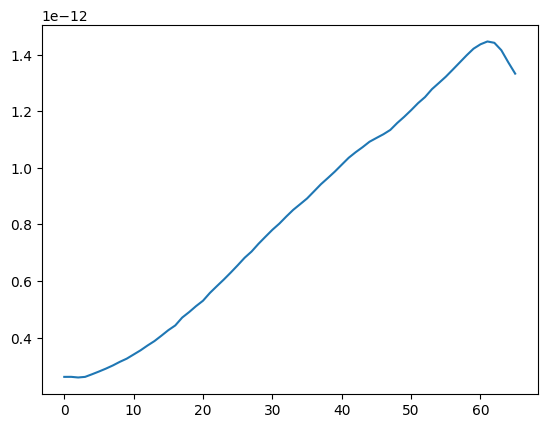

In [266]:
plt.plot(spec[40])

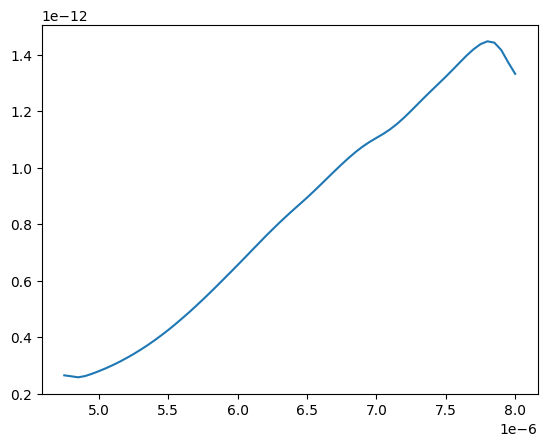

In [267]:
plt.plot(spectrum_train.iloc[40])

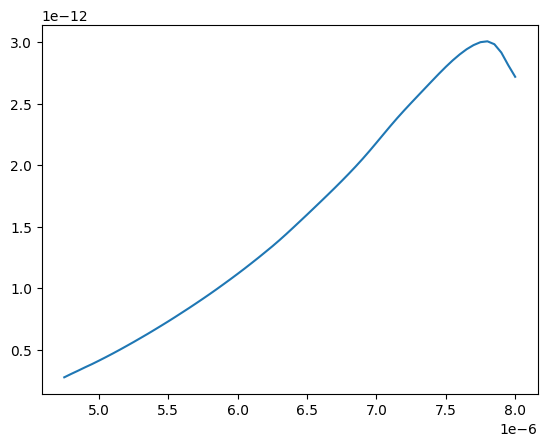

In [268]:
plt.plot(spectrum_test.iloc[20])

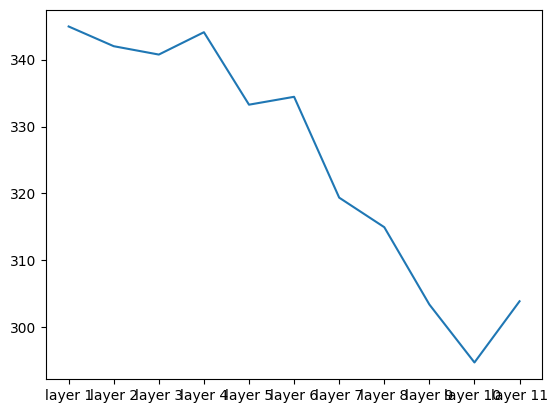

In [269]:
plt.plot(temp_train.iloc[30])

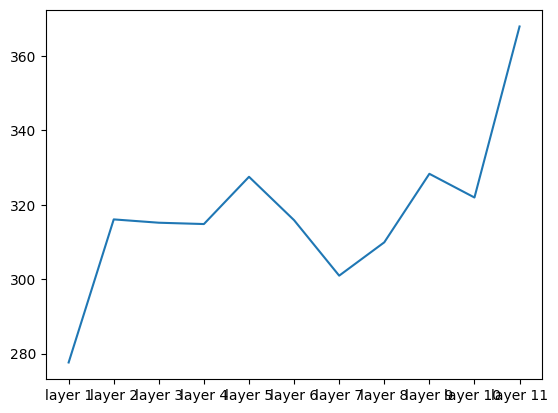

In [270]:
plt.plot(temp_test.iloc[50])

In [271]:
def add_noise(df, scale):
    noise = pd.DataFrame(np.random.normal(loc=0, scale=scale, size=df.shape), columns=df.columns)

    df_noisy = noise.add(df)

    return df_noisy

In [272]:
temp_train

,layer 1,layer 2,layer 3,layer 4,layer 5,layer 6,layer 7,layer 8,layer 9,layer 10,layer 11
0,323.542814,336.264134,314.373562,319.809810,322.683987,320.738026,321.123277,336.022206,327.239350,315.435360,306.809772
1,302.397305,308.020770,308.339731,314.529630,310.125411,324.512867,337.688990,339.958209,333.648389,332.220250,301.797698
2,342.253199,327.857420,322.749776,315.650814,316.674735,323.569400,324.433852,311.388109,315.627234,299.074724,327.954011
3,321.522941,345.488846,332.206767,323.959885,307.920920,307.908732,312.082073,324.729747,325.913700,331.626889,286.208296
4,345.272454,304.685696,311.402060,310.023810,322.799370,332.113227,334.099515,332.219769,333.842680,329.993893,346.495754
...,...,...,...,...,...,...,...,...,...,...,...
1995,301.910744,336.426122,335.313084,332.618147,326.017401,312.212826,293.840116,292.102242,293.892008,288.039673,297.384889
1996,372.711845,331.996217,339.521525,333.866750,331.912425,337.177115,327.628874,314.707999,304.663765,294.496732,294.216799
1997,281.857159,303.590926,308.725933,317.387679,321.682391,333.974251,330.288332,326.727931,324.592481,303.704642,314.488639
1998,327.769935,299.169325,317.122257,313.736682,325.639582,328.573713,329.756684,328.925934,327.803454,331.698024,305.229661


In [273]:
add_noise(temp_train, 10)

,layer 1,layer 2,layer 3,layer 4,layer 5,layer 6,layer 7,layer 8,layer 9,layer 10,layer 11
0,340.747796,331.125365,309.339582,326.843504,333.025356,313.705228,314.432594,340.223827,329.370397,328.399903,311.660048
1,310.504131,304.088571,315.639048,305.074662,318.821689,346.278417,330.909900,334.954435,329.757712,311.771979,311.726696
2,326.871231,331.419794,306.929784,307.231005,295.232662,320.161277,320.259824,308.431054,298.166012,290.048614,322.818998
3,330.844649,336.196671,334.562681,321.518916,302.136078,310.221674,308.822435,313.733844,329.251491,342.166659,298.473115
4,338.491114,302.191185,330.730097,316.837645,317.147487,324.820546,332.162051,330.715252,313.963989,334.298616,348.387485
...,...,...,...,...,...,...,...,...,...,...,...
1995,299.062773,327.709956,340.927507,336.787900,335.321365,327.559912,312.770289,295.376818,296.079781,298.895250,300.544186
1996,364.884367,338.504683,335.743735,344.848727,339.168549,333.851605,322.254258,300.678242,297.048208,285.117309,299.676148
1997,271.083781,304.051272,319.649441,309.351922,329.819696,320.285644,318.475085,321.284337,328.680707,307.733767,315.690485
1998,332.779558,297.469522,321.723692,327.722917,327.053640,334.747310,346.175550,332.322089,331.526258,316.432195,306.876250


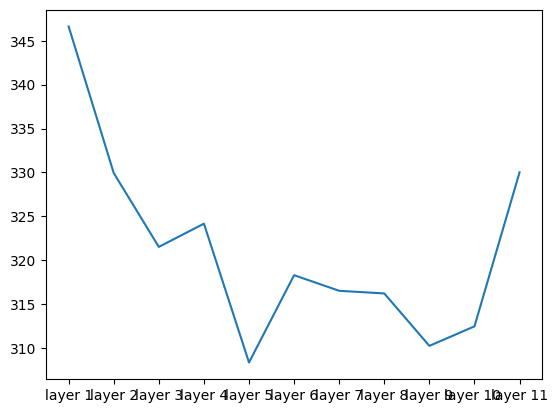

In [274]:
plt.plot(temp_test.iloc[20])

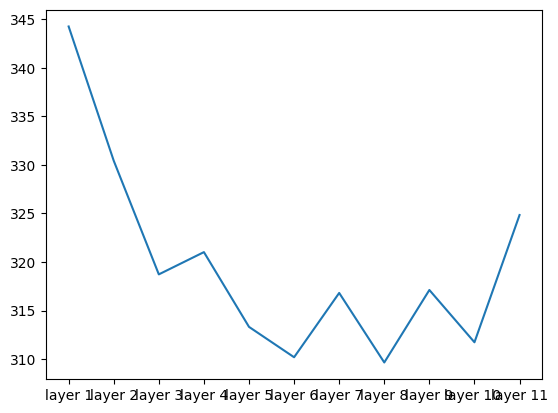

In [275]:
plt.plot(add_noise(temp_test, 5).iloc[20])

In [276]:
X, y = dp.get_data('combined_data.xlsx')